In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv('nyc_building_sales.csv', index_col=0)

C:\Users\Alex\Anaconda3\envs\nyc-buildings\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (19,22,24,25,66,67,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data['Borough'].value_counts()

Queens           9938
Brooklyn         7959
Staten Island    3876
Bronx            3024
Manhattan        1113
Name: Borough, dtype: int64

In [5]:
data.head(5)

,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Bronx,2278.0,23.0,499000.0,1667.0,215.086207,201.0,19.0,1010.0,7.0,8.0,10454.0,E060,40.0,4700.0,430 EAST 134 STREET,M1-2/R6A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-2/R6A/MX-1,NaN,N,B1,1.0,0.0,NaN,"SILVERSTEIN, ADAM",1667.0,2320.0,0.0,2320.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,2.0,2.0,16.67,100.0,16.67,40.0,NaN,3.0,N,5.0,1.0,4746.0,9751.0,0.0,0.0,1901.0,E,0.0,0.0,NaN,NaN,1.39,3.00,2.0,3.0,2.0,2.022780e+09,0.0,19.0,1005372.0,232886.0,6a,NaN,209S013,20901.0,NaN,0.0,NaN,1.0,15v1,378000.0,450000.0,9751.0,4.203017,162.931034,193.965517
1,Bronx,2278.0,35.0,158000.0,1808.0,65.020576,201.0,19.0,1010.0,7.0,8.0,10454.0,E060,40.0,4700.0,454 EAST 134 STREET,M1-2/R6A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-2/R6A/MX-1,NaN,N,A5,1.0,0.0,NaN,"TRASORAS, DAVID",1808.0,2430.0,0.0,2430.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,3.0,1.0,1.0,18.08,100.0,18.08,45.0,NaN,3.0,N,5.0,2.0,3631.0,8907.0,0.0,0.0,1901.0,E,0.0,0.0,NaN,NaN,1.34,3.00,2.0,3.0,2.0,2.022780e+09,0.0,19.0,1005560.0,232782.0,6a,NaN,209S013,20901.0,NaN,0.0,NaN,1.0,15v1,363000.0,400000.0,8907.0,3.665432,149.382716,164.609053
2,Bronx,2278.0,39.0,363000.0,1667.0,148.223765,201.0,19.0,1010.0,7.0,8.0,10454.0,E060,40.0,4700.0,462 EAST 134 STREET,M1-2/R6A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-2/R6A/MX-1,NaN,N,C0,2.0,0.0,NaN,BRONX LUXURY INVESTOR,1667.0,2449.0,0.0,2449.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,3.0,3.0,16.67,100.0,16.83,45.0,E,3.0,N,5.0,2.0,4638.0,9379.0,0.0,0.0,1901.0,E,0.0,0.0,NaN,NaN,1.47,3.00,2.0,3.0,2.0,2.022780e+09,0.0,19.0,1005620.0,232749.0,6a,NaN,209S013,20901.0,NaN,0.0,NaN,1.0,15v1,366000.0,464000.0,9379.0,3.829726,149.448755,189.465088
3,Bronx,2278.0,46.0,50000.0,1020.0,22.321429,201.0,19.0,1010.0,7.0,8.0,10454.0,E060,40.0,4700.0,476 EAST 134 STREET,M1-2/R6A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-2/R6A/MX-1,NaN,N,A5,1.0,0.0,NaN,CHARLES WHITE,1020.0,2240.0,0.0,2240.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,3.0,1.0,1.0,17.00,60.0,16.50,35.0,NaN,2.0,N,5.0,2.0,2191.0,6966.0,0.0,0.0,1901.0,E,2002.0,0.0,NaN,NaN,2.20,3.00,2.0,3.0,2.0,2.022780e+09,0.0,19.0,1005733.0,232708.0,6a,NaN,209S013,20901.0,NaN,0.0,NaN,1.0,15v1,337000.0,369000.0,6966.0,3.109821,150.446429,164.732143
4,Bronx,2280.0,12.0,405000.0,1422.0,208.333333,201.0,25.0,5002.0,7.0,8.0,10454.0,E060,40.0,4500.0,408 EAST 136 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6,NaN,N,A5,1.0,0.0,NaN,VELASCO ALICIA,1422.0,1944.0,0.0,1944.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,2.0,1.0,1.0,18.00,79.0,18.00,36.0,NaN,2.0,N,5.0,1.0,3478.0,8133.0,0.0,0.0,1901.0,E,0.0,0.0,Bertine Block,NaN,1.37,2.43,0.0,4.8,2.0,2.022800e+09,0.0,25.0,1005433.0,233458.0,6a,NaN,209S014,20901.0,NaN,0.0,NaN,1.0,15v1,311000.0,369000.0,8133.0,4.183642,159.979424,189.814815


In [6]:
%matplotlib inline

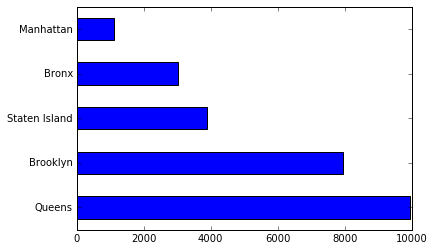

In [7]:
data['Borough'].value_counts().plot(kind='barh')

The difference between the number of buildings sold in Queens and the number sold in Brooklyn is surprising.

In [8]:
# data.groupby('Borough')

In [9]:
# help(pd.groupby)

In [10]:
import missingno as msno

In [11]:
import matplotlib.pyplot as plt

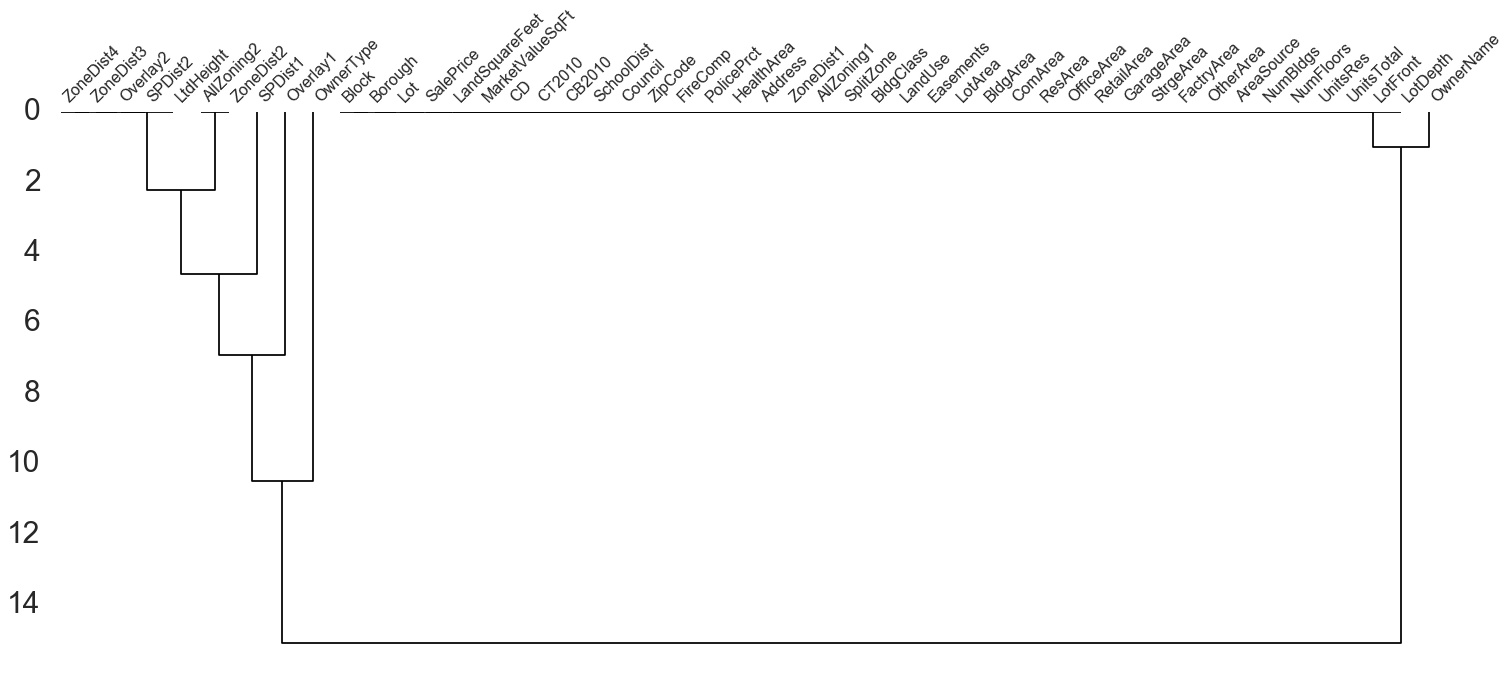

In [12]:
mat = msno.dendrogram(data.ix[1:250, 0:50], inline=False)
mat.axes[0].tick_params(axis='y', labelsize=30)

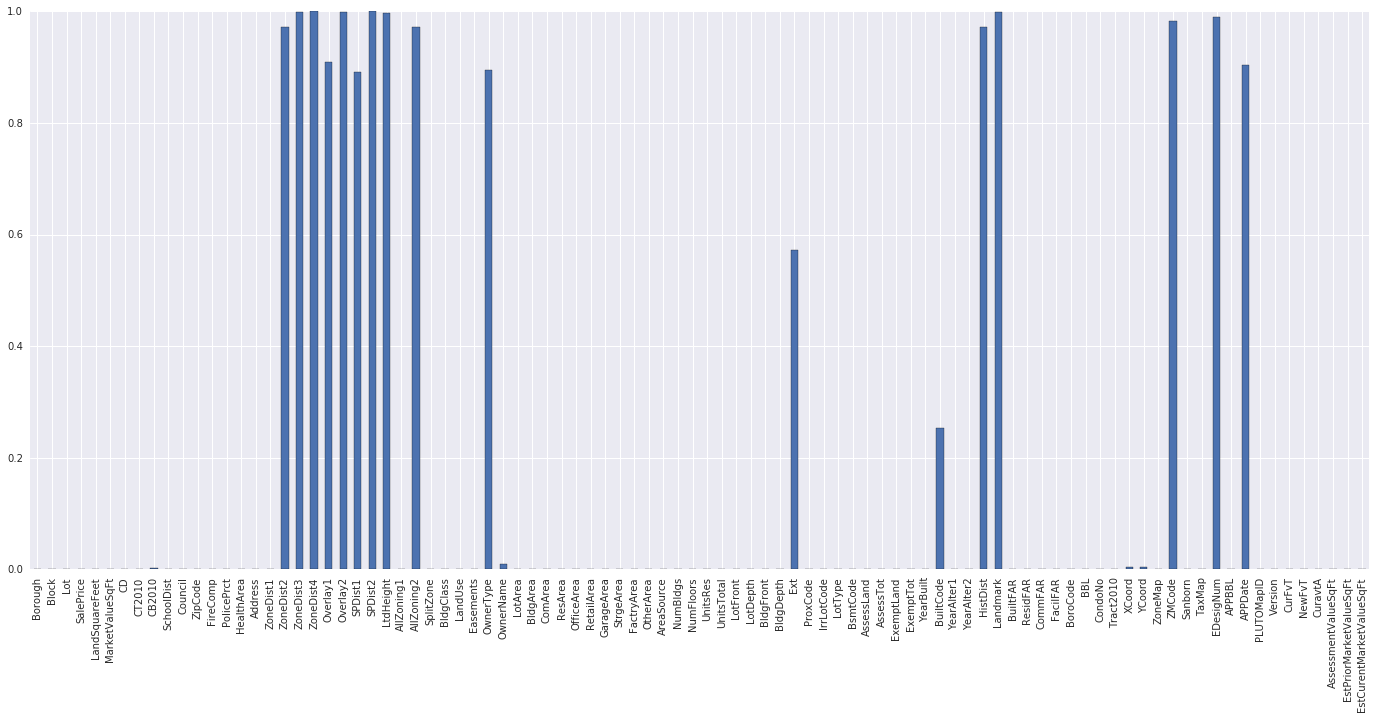

In [13]:
(data.isnull().sum() / len(data)).plot(kind='bar', figsize=(24, 10))

`apply` can return not only singulars but also `Series`!

In [14]:
data.ix[:, ['Block', 'Lot']].apply(lambda x: pd.Series([x.min(), x.max()]))

,Block,Lot
0,7.0,1.0
1,16322.0,7515.0


Using `idxmax` to find the lot in the record with the highest block number.

In [15]:
data.iloc[data['Block'].idxmax()]

Borough                           Staten Island
Block                                       250
Lot                                          53
SalePrice                                640000
LandSquareFeet                             7800
MarketValueSqFt                         266.667
CD                                          501
CT2010                                       59
CB2010                                     2000
SchoolDist                                   31
Council                                      49
ZipCode                                   10301
FireComp                                   E156
PolicePrct                                  120
HealthArea                                  400
Address                     86 UNIVERSITY PLACE
ZoneDist1                                   R3X
ZoneDist2                                   NaN
ZoneDist3                                   NaN
ZoneDist4                                   NaN
Overlay1                                

In [16]:
data = data.sort_values(by = 'SalePrice', ascending=False)

In [17]:
data.tail(10)[::-1][['SalePrice', 'Address', 'AssessmentValueSqFt', 'EstPriorMarketValueSqFt',
                     'EstCurentMarketValueSqFt', 'MarketValueSqFt']]

,SalePrice,Address,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,MarketValueSqFt
Index,,,,,,
21958,20600.0,166 BEACH 26 STREET,14.830476,293.333333,302.857143,39.238095
6179,24000.0,531 SHEFFIELD AVENUE,5.693293,42.073171,50.609756,7.317073
11050,25000.0,3092 EMMONS AVENUE,18.645833,310.763889,420.138889,43.402778
22160,30000.0,100-06 ROCKAWAY BEACH BLVD,17.571429,292.857143,326.190476,71.428571
21708,30000.0,145-04 157 STREET,16.985491,330.357143,333.705357,33.482143
11085,30000.0,44 GOTHAM AVENUE,7.500000,16.666667,16.666667,125.000000
22050,30500.0,589 BEACH 43 STREET,9.513258,198.863636,198.863636,57.765152
21703,34500.0,102-23 CALHOUN ROAD,17.687500,445.312500,601.562500,89.843750
6040,35490.0,385 LEGION STREET,11.737949,81.794872,65.384615,9.100000


In [18]:
data[data['Address'] == '102 WEST 57 STREET']

,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11524,Manhattan,1009.0,37.0,48012597.0,4940992.0,10615.21048,105.0,137.0,5000.0,2.0,4.0,10019.0,E023,18.0,4700.0,102 WEST 57 STREET,C5-3,NaN,NaN,NaN,NaN,NaN,MID,NaN,NaN,C5-3/MID,NaN,N,H3,5.0,0.0,NaN,HILTON RESORTS CORPOR,7532.0,4523.0,4523.0,0.0,0.0,4523.0,0.0,0.0,0.0,0.0,7.0,1.0,28.0,0.0,2.0,75.0,100.42,75.0,100.42,NaN,0.0,N,5.0,2.0,4500000.0,14319900.0,0.0,0.0,2007.0,NaN,0.0,0.0,NaN,NaN,0.6,10.0,15.0,15.0,1.0,1.010090e+09,0.0,137.0,990356.0,217746.0,8c,NaN,106W032,10401.0,NaN,1.010090e+09,9/16/2009,1.0,15v1,31822000.0,32224000.0,14319900.0,3166.01813,7035.595843,7124.474906


In [19]:
data[data['Address'] == '102 WEST 57 STREET'][['SalePrice', 'Address', 'AssessmentValueSqFt', 'EstPriorMarketValueSqFt',
                     'EstCurentMarketValueSqFt', 'MarketValueSqFt']]

,SalePrice,Address,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,MarketValueSqFt
Index,,,,,,
11524,48012597.0,102 WEST 57 STREET,3166.01813,7035.595843,7124.474906,10615.21048


In [20]:
data[data['Address'] == '102 WEST 57 STREET'][['SalePrice']].sum()

SalePrice    48012597.0
dtype: float64

In [21]:
len(data['Address'].value_counts()[data['Address'].value_counts() > 1])

11

In [22]:
data['Address'].value_counts()[data['Address'].value_counts() > 1].sum()

34